In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.dates as mdates
import seaborn as sb
import fbprophet
from fbprophet import Prophet
import ipywidgets as widgets
import datetime as dt
from IPython.display import display, clear_output
import logging

# Ignore warnings and fbprophet logs
warnings.filterwarnings("ignore")
logging.getLogger('fbprophet').setLevel(logging.WARNING)

Importing plotly failed. Interactive plots will not work.


In [2]:
# Import gold price data into Pandas DataFrame
df = pd.read_csv("gold_monthly_csv.csv")

In [3]:
# format date
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
# add attributes to DataFrame
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month

<h1 style="color:gold; font-size:400%; text-align:center; text-shadow: -1px 0 black, 0 1px black, 1px 0 black, 0 -1px black;">Gold</h1>

In [4]:
# image widget
file = open("gold_bars.png", "rb")
image = file.read()

image_headline = widgets.Image(
                    value=image,
                    format='png',
                    width='300')

In [5]:
text_0 = widgets.HTML(value="<h2>Why you should invest in gold</h2>" +
                      "<ul><li>Gold is a valuable asset due to its scarcity.</li>"+
                      "<li>It can guards one's wealth against market uncertainty and inflation</li></ul>")

In [6]:
hbox_headline = widgets.HBox([image_headline, text_0])
display(hbox_headline)

<br><h1>Gold Prices Over the Past 71 Years</h1>

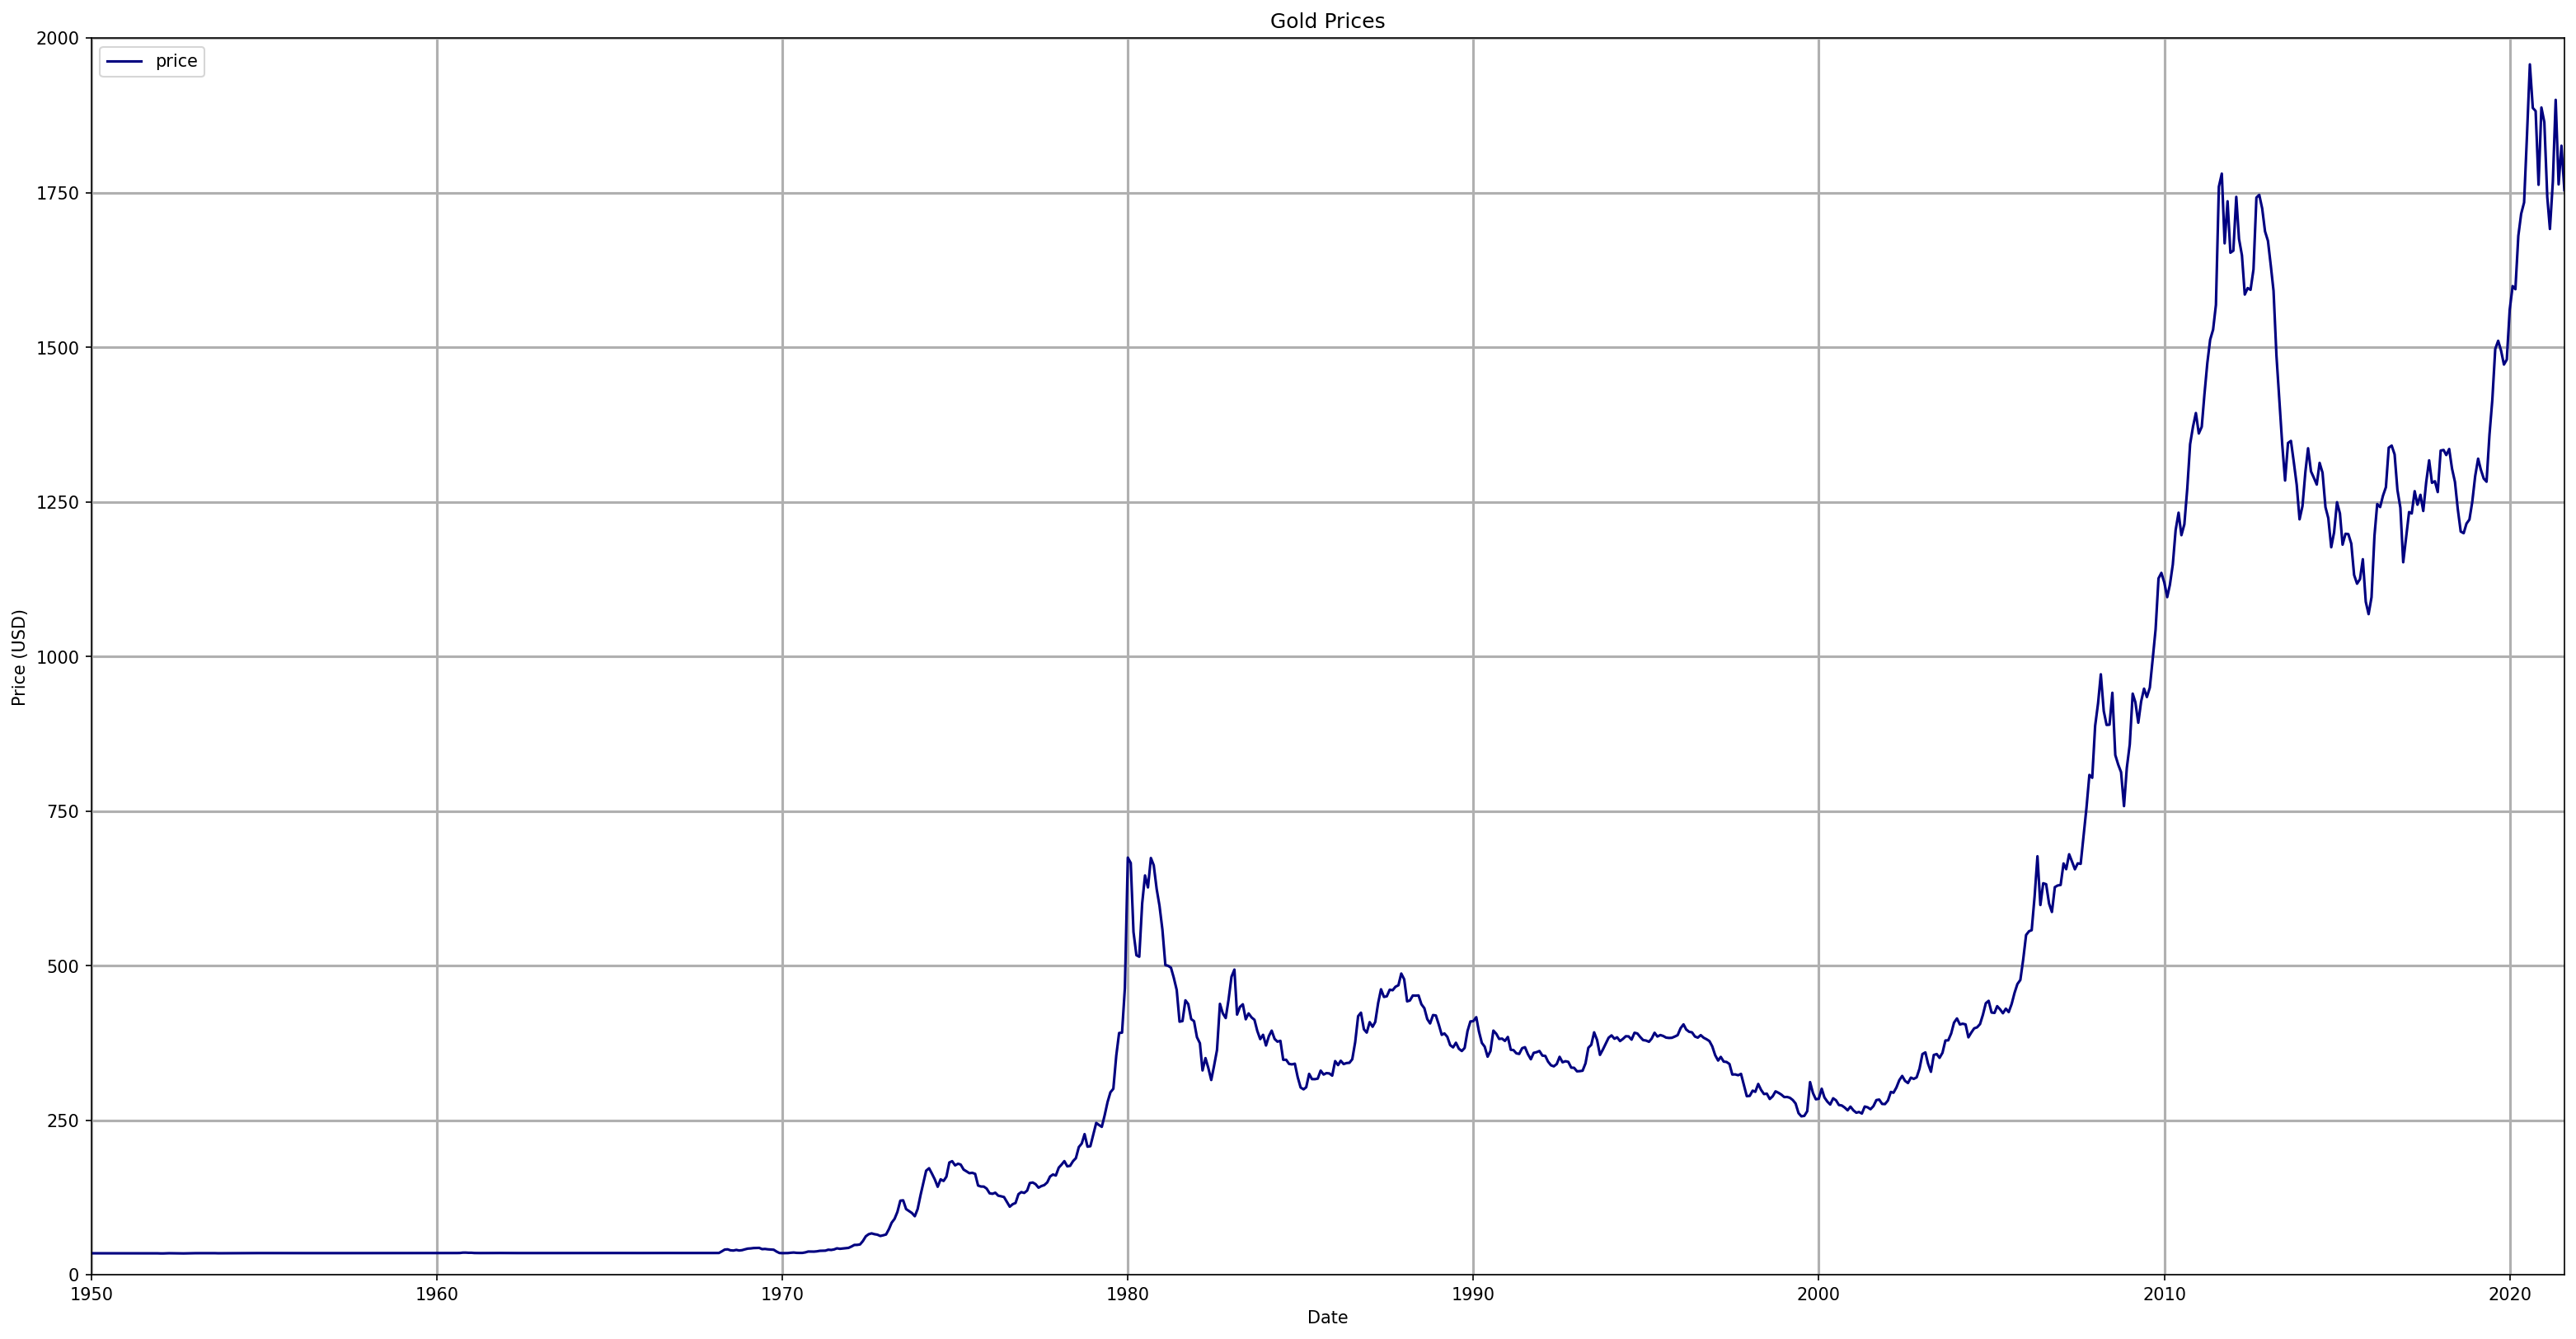

In [7]:
# Histogram Historical Gold Prices
fig_1 = plt.figure(figsize=(20, 10), dpi=150)
# add axes to figure object
axes_1 = fig_1.add_axes([0, 0, 1, 1]) #left, bottom, width, height in percentage, [0,0,1,1] takes up all space
 
# set axes labels
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Price (USD)')
axes_1.set_title('Gold Prices')

# add a grid
axes_1.grid(lw=1.5)

# set limits to zoom in and eliminate space along x-axis
axes_1.set_xlim([dt.date(1950, 1, 1), dt.date(2021, 8, 1)])
axes_1.set_ylim([0, 2000])

# plot on axes
axes_1.plot(df["Date"], df["Price (USD)"], label='price', color="navy")
# axes legend and position
axes_1.legend(loc=0)

plt.show()

<br><h2>Distribution of Gold Prices</h2>

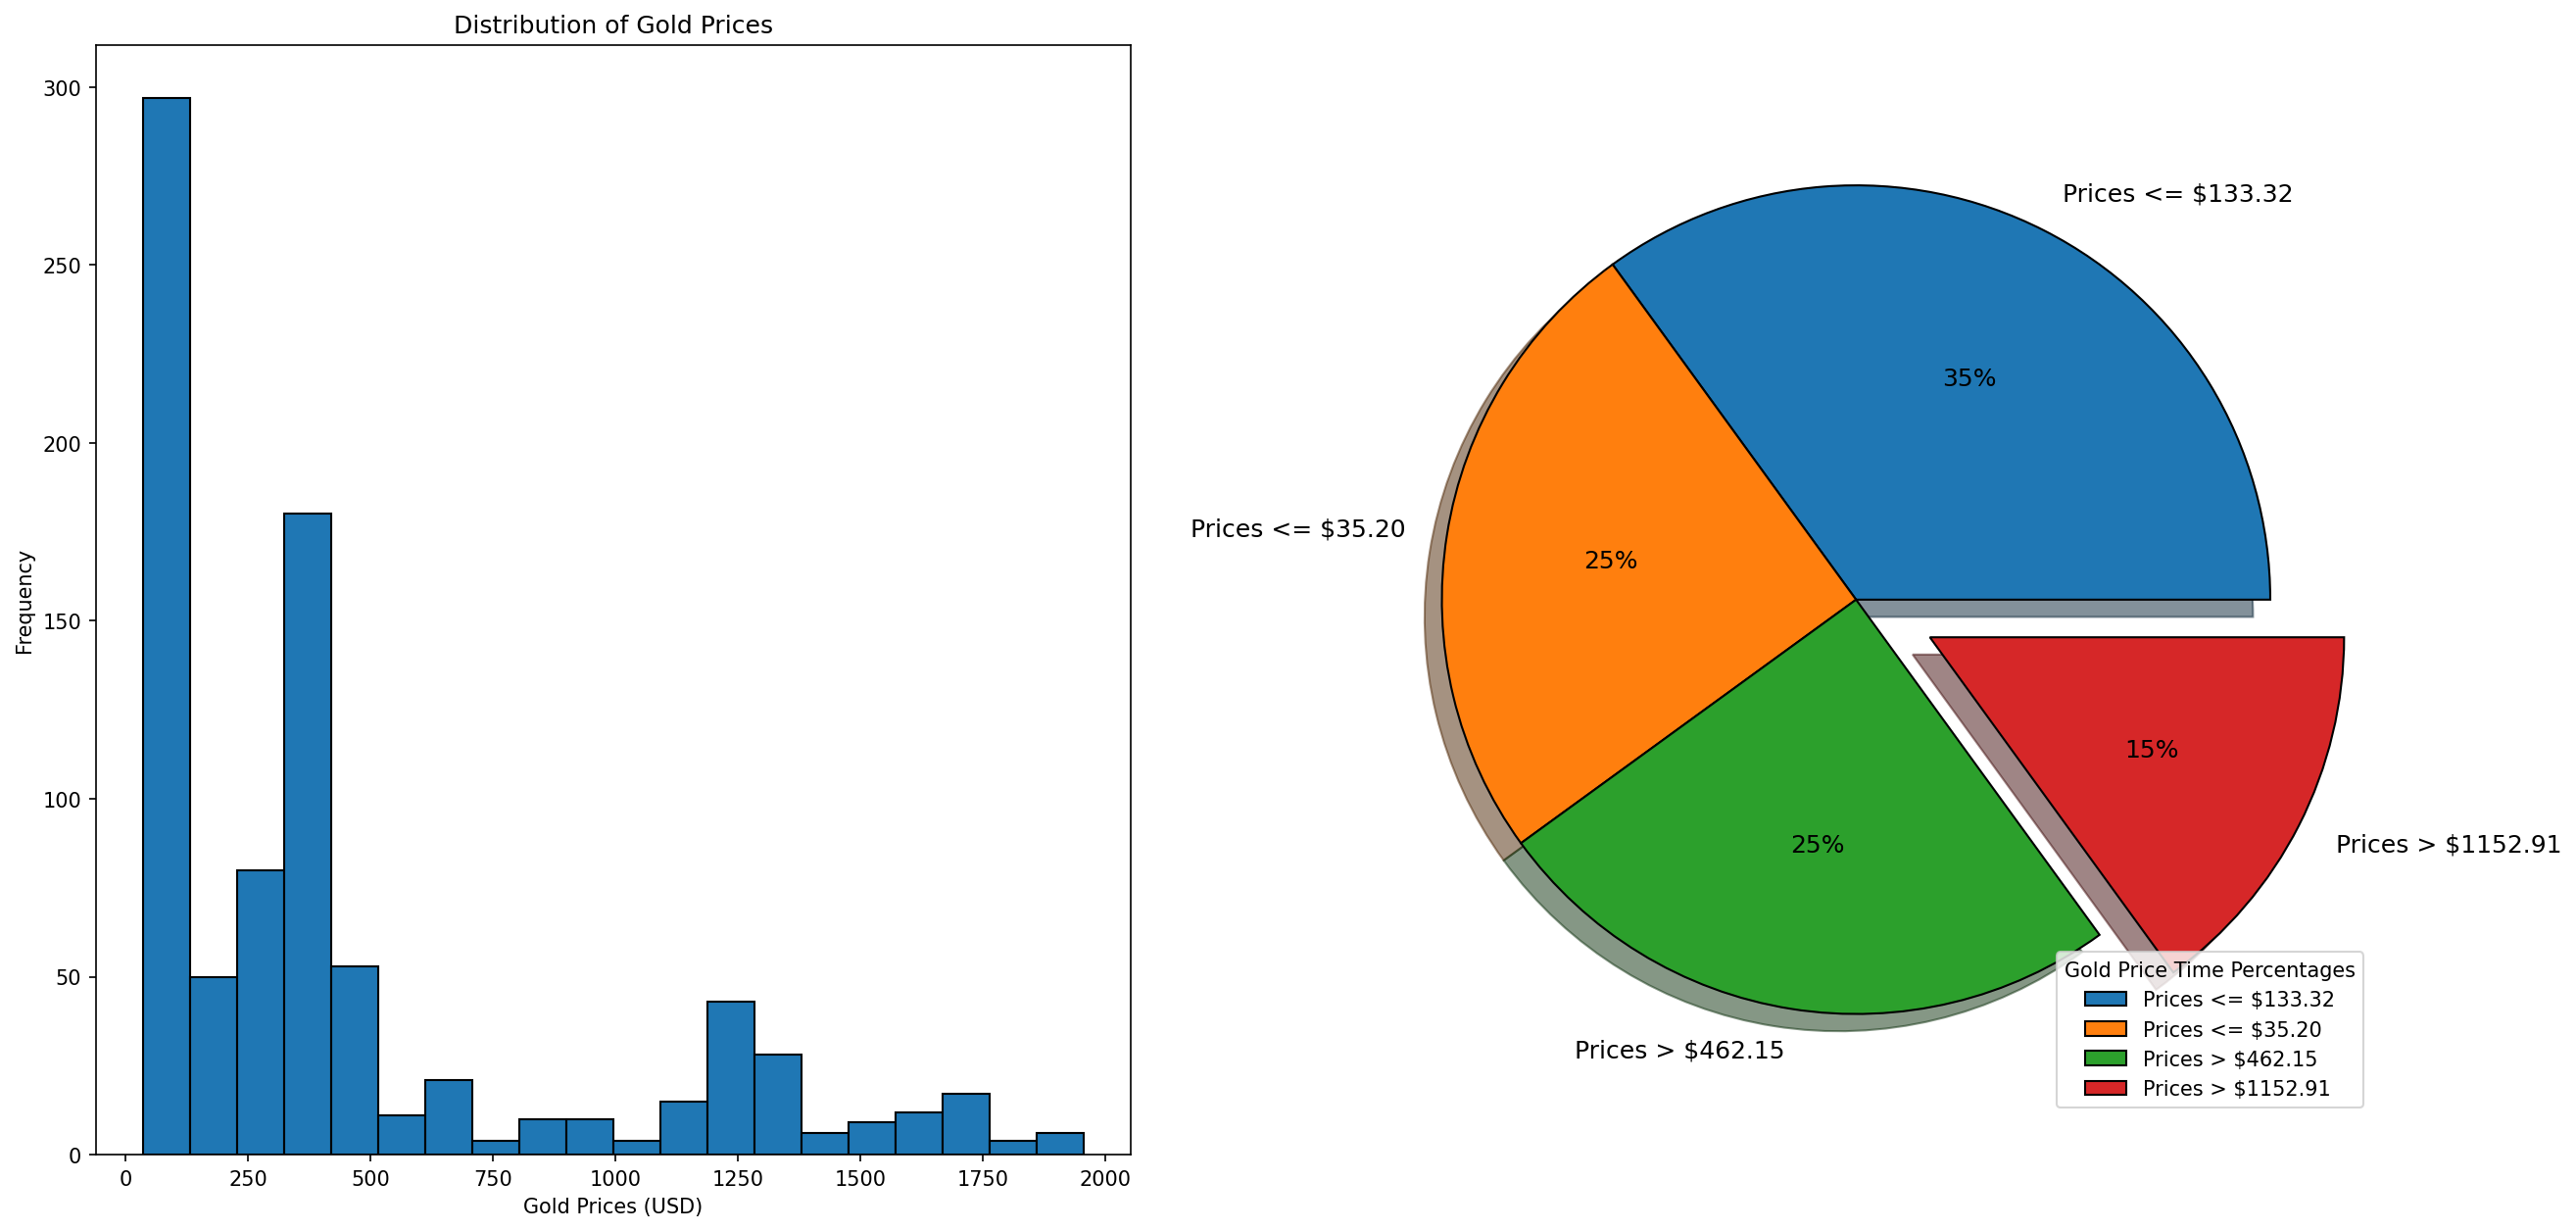

In [8]:
# Display visuals for data distribution

# Subplots
fig_2, axes_2 = plt.subplots(1, 2, figsize=(20, 10), dpi=150)
# Histogram
axes_2[0].hist(df["Price (USD)"], bins=20, edgecolor='black')
axes_2[0].set_xlabel("Gold Prices (USD)")
axes_2[0].set_ylabel("Frequency")
axes_2[0].set_title("Distribution of Gold Prices")

# pie chart
pie_slices = [35, 25, 25, 15]
pie_labels = ["Prices <= $133.32", "Prices <= $35.20", "Prices > $462.15", "Prices > $1152.91"]
axes_2[1].pie(pie_slices, labels=pie_labels, startangle=0, autopct='%2.0f%%', explode=[0, 0, 0, 0.2], shadow=True, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
axes_2[1].legend(title = "Gold Price Time Percentages", loc=4)

plt.show();

In [9]:
# Display data statistics
df_prices = df[['Price (USD)']]
round(df_prices.describe(), 2)

,Price (USD)
count,860.00
mean,437.80
std,481.90
min,34.49
25%,35.20
50%,324.43
75%,462.15
max,1957.40


<h2>What we can infer:</h2>
<p>For more than half of the 71 years of data, gold has been priced less than $150 per ounce. From the line graph we 
can also observe that there have been years where prices have had a steep drop. So, there could 
have been world economic events that could have had an effect on these fluctuations. Overall, 
gold has been on an upward trend. </p>

<h1 style="color:gold; font-size:400%; text-align:center">Gold Forecasting</h1>
<h2>Is it possible to see into the future?</h2>
<p>It is possible to a get somewhat close prediction using past observations. 
Forecasting is accomplished by using the science of machine learning. The further we predict into the future, the less accurate our prediction will be. This is expected as no machine learning algorithm is perfect. However, this is still very useful to give us a glimpse into the future.<br>  
We will use Facebook’s Prophet machine learning algorithm for our machine learning model. </p>

In [10]:
# copy original DataFrame
df_prophet = df[['Date', 'Price (USD)']]

In [11]:
# input to prophet needs columns named 'ds' (datestamp) and 'y' (measurement to forecast), so we'll make those changes
df_prophet.columns = ['ds', 'y']

In [12]:
# intantiate and fit prophet ML model
model = Prophet()
model.fit(df_prophet);

In [13]:
text_2 = widgets.HTML(value="<h3>select how many years to forecast, then click the button to generate a graph</h3>")

In [14]:
# Year selector
pred_selector = widgets.Dropdown(options=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                value=1, description='Years:', disabled=False)

In [15]:
# button
button_pred = widgets.Button(
    description='predict prices', 
    tooltip='click to generate prediction', 
    style={'description_width': 'initial', 'font_weight': 'bold'},
    button_style='warning')

output = widgets.Output()

def pred_button_clicked(event):
    with output:
        clear_output()
        years = pred_selector.value
        months = years * 12
        future = model.make_future_dataframe(periods=months, freq='m')
        forecast = model.predict(future)
        
        #generate graph
        fig_13 = plt.figure(figsize=(20, 10), dpi=150)
        # add axes to figure object
        axes_13 = fig_13.add_axes([0, 0, 1, 1]) #left, bottom, width, height in percentage, [0,0,1,1] takes up all space

        # set axes labels
        axes_13.set_xlabel('Date')
        axes_13.set_ylabel('Price (USD)')
        axes_13.set_title('Gold Prices')

        # add a grid
        axes_13.grid()
        
        axes_13.set_xlim([dt.date(1950, 1, 1), dt.date(2021 + years, 8, 1)])

        # plot on axes
        axes_13.plot(forecast.ds[forecast["ds"] > "2021-8-1"], forecast.yhat[forecast["ds"] > "2021-8-1"], label='Predicted Prices', color="gold", lw=2)
        axes_13.plot(df["Date"], df["Price (USD)"], label="Historical Prices", color="navy", lw=2)
        
        axes_13.legend(loc=0) #loc 0 chooses best location, 

        plt.show()
        
        
button_pred.on_click(pred_button_clicked)

hbox_pred = widgets.VBox([text_2, pred_selector, button_pred, output])
display(hbox_pred)

<br><br><br><br><h2>ML Model Evaluation Metrics</h2>
<p>To evaluate this model we will split the data set into a training and validation set. We will run a prediction for 5 years and compare the prediction against the validation set</p>

In [16]:
# copy original dataframe and train on new instance of ML model to evaluate
# split data into two different sets to train and validate model
split = df_prophet.index.max()-60 # 5 years
df_train = df_prophet.loc[df_prophet.index <= split].copy()
df_test = df_prophet.loc[df_prophet.index > split].copy()

In [17]:
test_model = Prophet()
test_model.fit(df_train);

In [18]:
test_preds = test_model.predict(df_test)

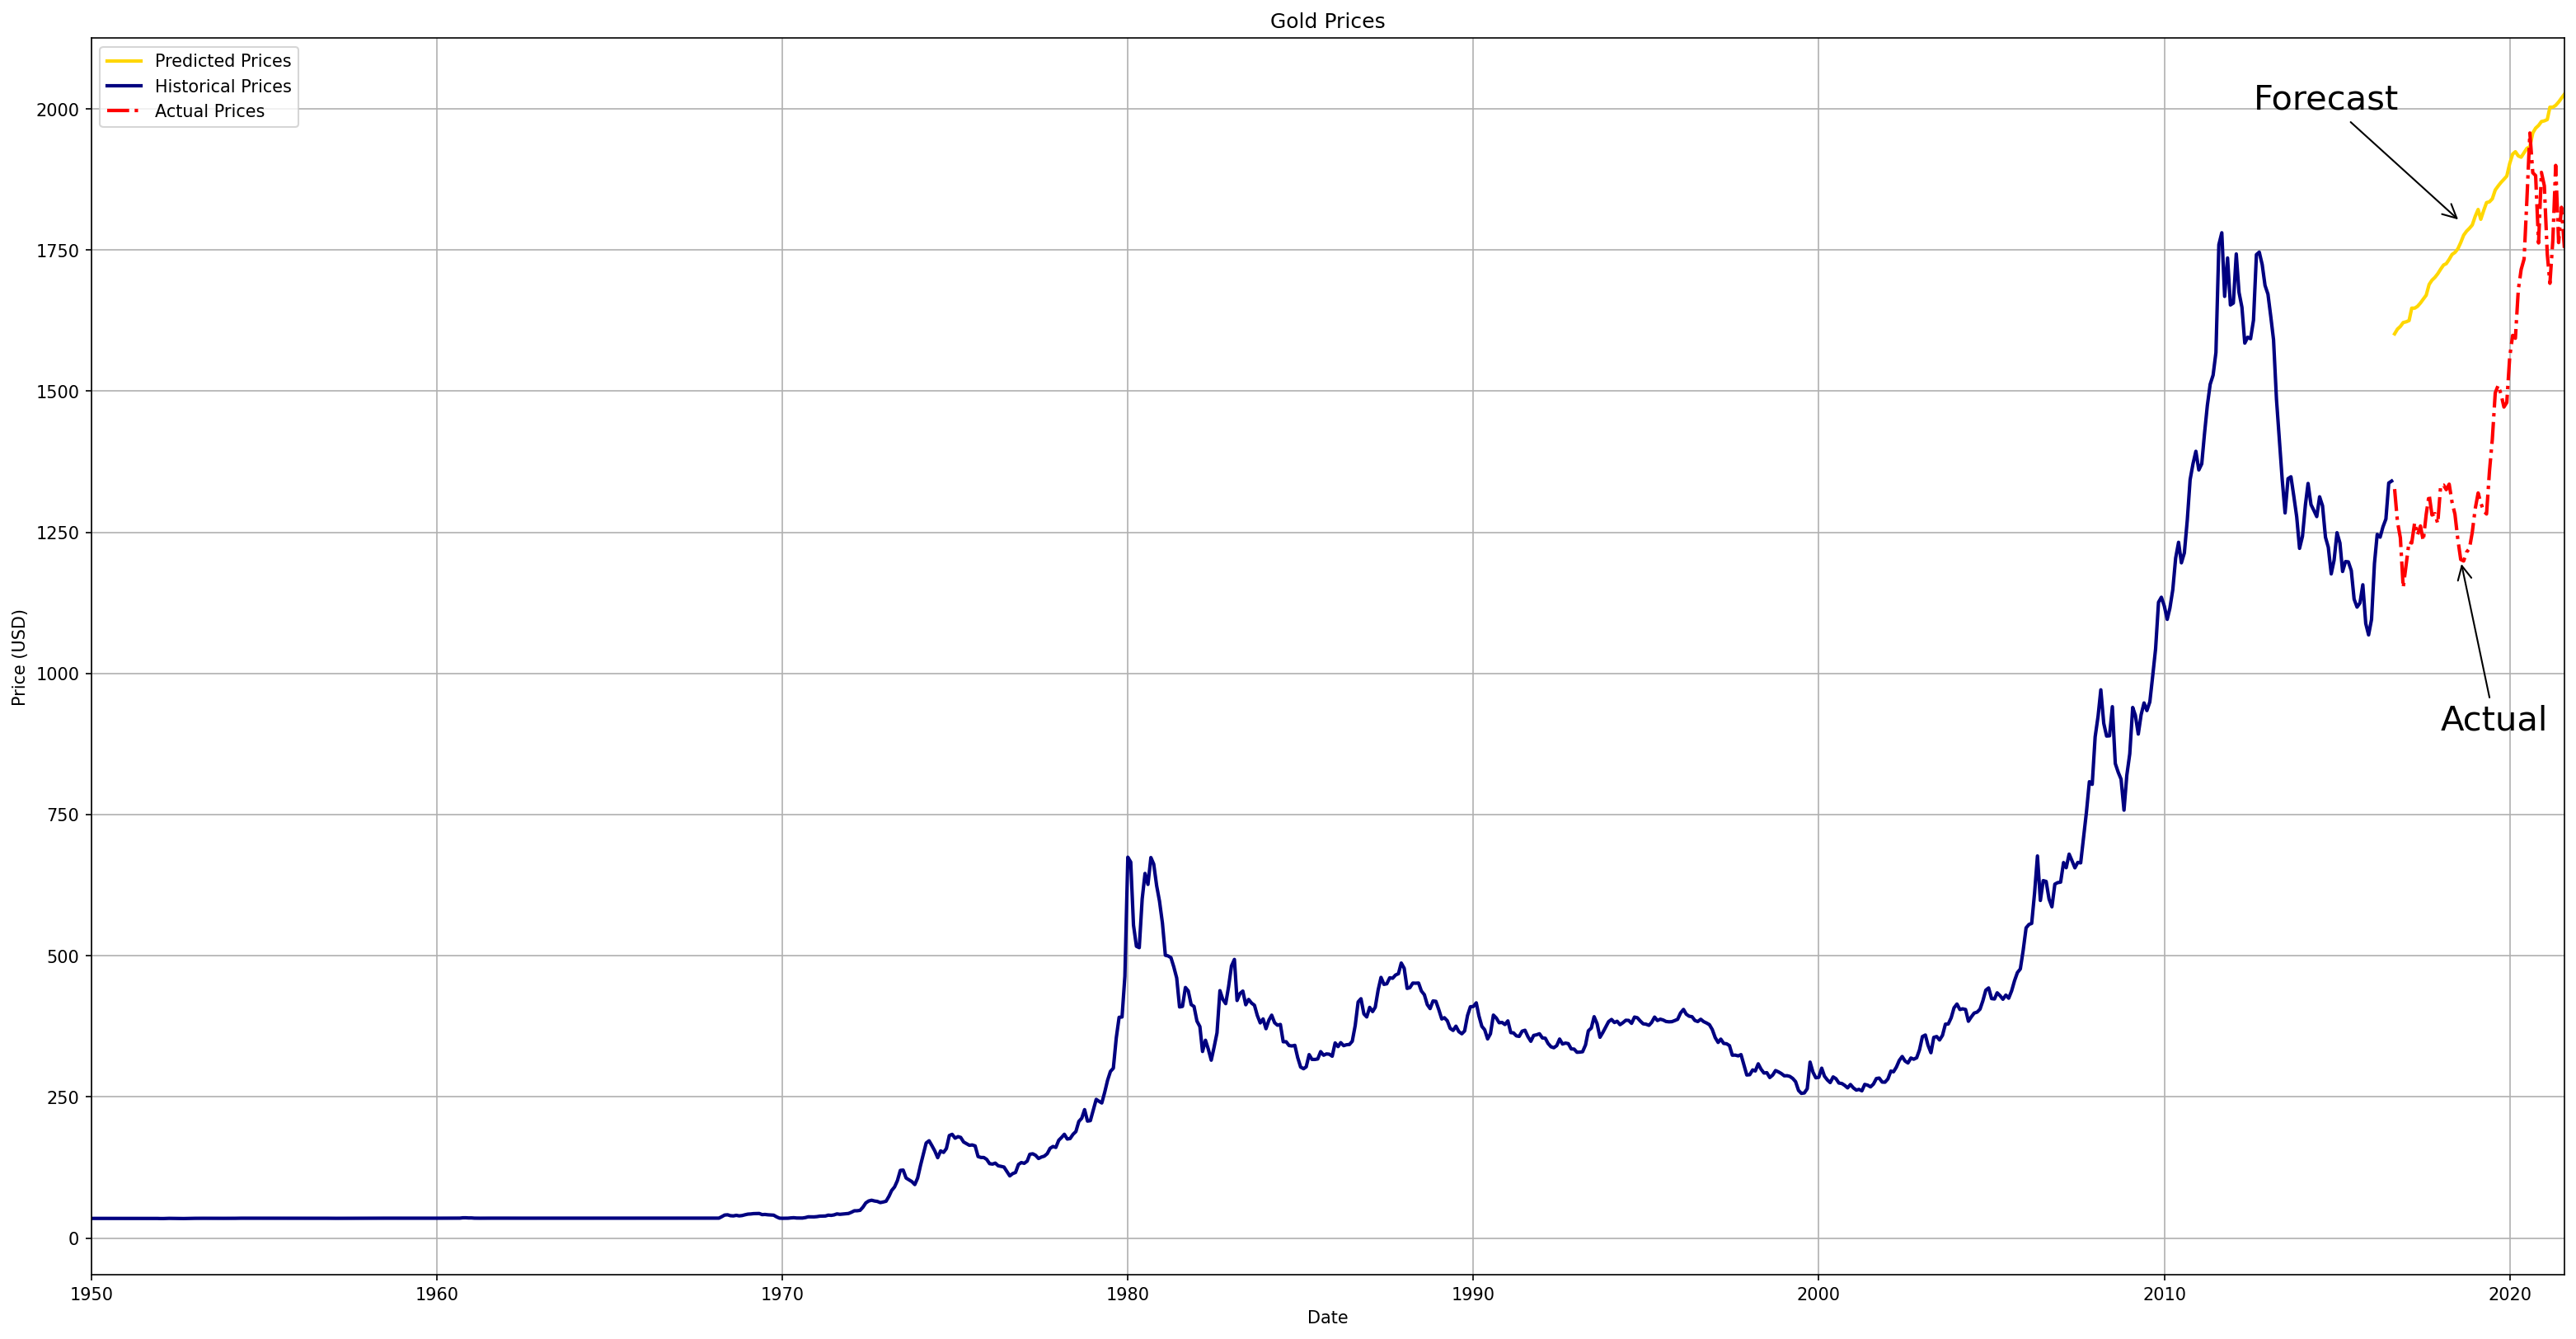

In [19]:
# graph prediction
fig_test = plt.figure(figsize=(20, 10), dpi=150)
# add axes to figure object
axes_test = fig_test.add_axes([0, 0, 1, 1]) #left, bottom, width, height in percentage, [0,0,1,1] takes up all space

# set axes labels
axes_test.set_xlabel('Date')
axes_test.set_ylabel('Price (USD)')
axes_test.set_title('Gold Prices')

# add a grid
axes_test.grid()

axes_test.set_xlim([dt.date(1950, 1, 1), dt.date(2021, 8, 1)])

# plot on axes
axes_test.plot(test_preds.ds[test_preds["ds"] > "2016-8-1"], test_preds.yhat[test_preds["ds"] > "2016-8-1"], label='Predicted Prices', color="gold", lw=2)
axes_test.plot(df_prophet.ds[df_prophet["ds"] <= "2016-8-1"], df_prophet.y[df_prophet["ds"] <= "2016-8-1"], label='Historical Prices', color="navy", lw=2)
axes_test.plot(df_prophet.ds[df_prophet["ds"] > "2016-8-1"], df_prophet.y[df_prophet["ds"] > "2016-8-1"], label='Actual Prices', color="red", lw=2, ls='-.')
axes_test.annotate('Actual', xy=(dt.date(2018, 8, 1), 1200), xytext=(dt.date(2018, 1, 1), 900), arrowprops=dict(facecolor='black', 
                                arrowstyle= "->", color="black"), fontsize=20)
axes_test.annotate('Forecast', xy=(dt.date(2018, 8, 1), 1800), xytext=(dt.date(2012, 8, 1), 2000), arrowprops=dict(facecolor='black', 
                                arrowstyle= "->", color="black"), fontsize=20)
axes_test.legend(loc=0)

plt.show()

<h3>Evaluation Metrics</h3>

In [20]:
# metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

print('Error Metrics: ')
mae = round(mean_absolute_error(y_true=df_test['y'], y_pred=test_preds['yhat']), 2)
print(f'MAE: {mae}')

mse = mean_squared_error(y_true=df_test['y'], y_pred=test_preds['yhat'])
rmse = round(sqrt(mse), 2)
print(f'RMSE: {rmse}')

Error Metrics: 
MAE: 357.62
RMSE: 384.09


<p>we can see that model is not perfect, but it captured the upwards trend</p>